In [2]:
import matplotlib.pyplot as plt
import math
from math import sqrt, pi, acos, cos, tan, atan2, sin

Text(0.5, 1.0, 'Angle Value vs Servo Angle')

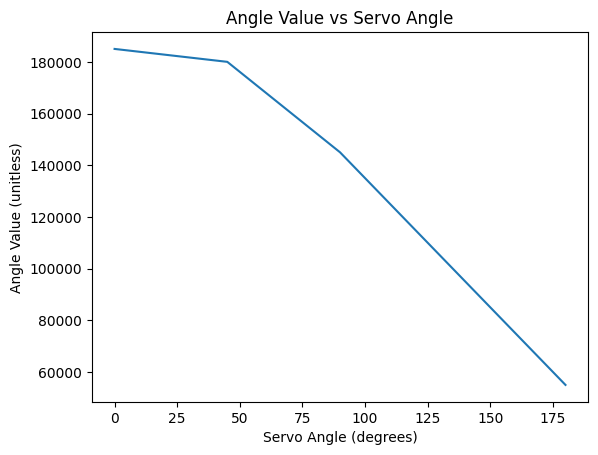

In [3]:
plt.plot([180, 135, 90, 45, 0], [55000, 100000, 145000, 180000, 185000])
plt.xlabel("Servo Angle (degrees)")
plt.ylabel("Angle Value (unitless)")
plt.title("Angle Value vs Servo Angle")

In [4]:
d180 = 55000
d135 = 100000
d90 = 145000
d45 = 180000
d0 = 185000

In [45]:
def radians_to_bits(x):
    return int( ( (180 - (x* (180/math.pi)) ) / 180 ) * ( d0 - d180) )  + d180

In [6]:
l = 8  # Inches

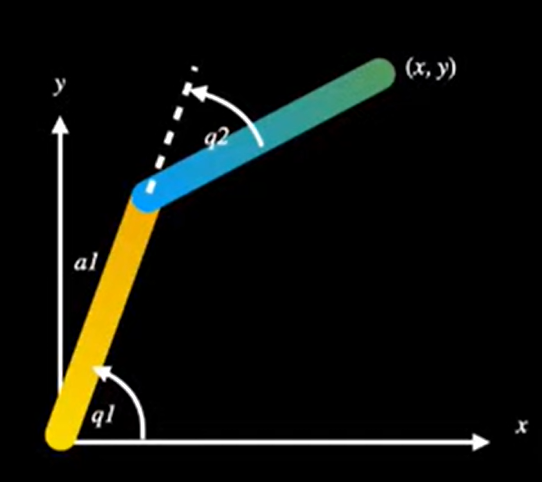

In [75]:
L1 = 3
L2 = 3

# https://stackoverflow.com/questions/76970645/calculate-inverse-kinematics-of-2-dof-planar-robot-in-python

print(f"always @(posedge clk) begin")
print(f"    if (reset) begin")
print(f"        elbow_angle <= {d90};")
print(f"        shoulder_angle <= {d90};")
print(f"    end else begin")
print("        case({x, y})")

for x in range(1, 5):
    for y in range(1,5):
        d2 = x**2 + y**2
        d = d2**0.5
        
        base_angle = atan2(y, x)
        
        # C:= cos of the first angle in a triangle defined by L1 and L2
        # the formula comes from the Law of Cosines
        C = (L1**2 + d2 - L2**2) / (2*L1*d)
        c = acos(C)
        
        # Check if the target is reachable.
        # If C > 1, it means the target is outside the workspace of the robot
        # If C < -1, it means the target is inside the workspace, but not reachable
        if -1 <= C <= 1:
           # B:= cos of the second angle
            B = (L1**2 + L2**2 - d2) / (2*L1*L2)
            b = acos(B)
        
            shoulder_bits = radians_to_bits(base_angle+c)
            elbow_bits = radians_to_bits(-1 * (b-pi))

            if x==1 and y==1:
                print(f"            default : begin  // x={x} y={y}\n                // elbow = {round((base_angle+c)*(180/math.pi), 1)}\n                // shoulder = {round(-1*(b-pi)*(180/math.pi), 1)}\n                elbow_angle <= {elbow_bits};\n                shoulder_angle <= {shoulder_bits};\n            end")

        
            # consider returning only one if c is close to 0
            print(f"            16'b{format(x, '08b')}_{format(y, '08b')} : begin  // x={x} y={y}\n                // elbow = {round((base_angle+c)*(180/math.pi), 1)}\n                // shoulder = {round(-1*(b-pi)*(180/math.pi), 1)}\n                elbow_angle <= {elbow_bits};\n                shoulder_angle <= {shoulder_bits};\n            end")

print("        endcase")
print("    end")
print("end")

always @(posedge clk) begin
    if (reset) begin
        elbow_angle <= 145000;
        shoulder_angle <= 145000;
    end else begin
        case({x, y})
            default : begin  // x=1 y=1
                // elbow = 121.4
                // shoulder = 152.7
                elbow_angle <= 74692;
                shoulder_angle <= 97346;
            end
            16'b00000001_00000001 : begin  // x=1 y=1
                // elbow = 121.4
                // shoulder = 152.7
                elbow_angle <= 74692;
                shoulder_angle <= 97346;
            end
            16'b00000001_00000010 : begin  // x=1 y=2
                // elbow = 131.6
                // shoulder = 136.2
                elbow_angle <= 86605;
                shoulder_angle <= 89988;
            end
            16'b00000001_00000011 : begin  // x=1 y=3
                // elbow = 129.8
                // shoulder = 116.4
                elbow_angle <= 100942;
                shoulder_angle <= 91285;
   

In [74]:
4 % 4

0

In [78]:
2 ** 10

1024

In [79]:
1 << 8

256